In [1]:
import pandas as pd
import numpy as np

In [38]:
cards.columns

Index(['next_interval', 'factor', 'due', 'num_reviews', 'upvotes',
       'downvotes'],
      dtype='object')

In [189]:
factor = 3
min_factor = 2

In [192]:
factor = factor - (factor-min_factor)*0.8
factor

2.008

In [179]:
factor = factor + 1
factor

8

In [196]:
factor = factor - (factor-min_factor)*0.8
factor

2.0000128

In [65]:
new_cards_per_day = 10
factor = 3
review_time = 5#s
num_days = 700
drop_cards_pct = 0

upvote_pct = 0.2
downvote_pct = 0.8

upvote_factor_adj = 0.5
downvote_factor_adj = 0.5

review_time_per_day = np.zeros(num_days)
reviewed_cards_per_day = np.zeros(num_days)
avg_upvote = np.zeros(num_days)

cards = pd.DataFrame([], columns=[
    'next_interval', 
    'factor', 
    'due', 
    'num_reviews', 
    'upvotes',
    'downvotes'])
for today in range(num_days):
    new_cards = pd.DataFrame({
        "next_interval": [1]*new_cards_per_day,
        "factor": [factor]*new_cards_per_day,
        "due": [today]*new_cards_per_day,
        "num_reviews": [0]*new_cards_per_day,
        "upvotes": [0]*new_cards_per_day,
        "downvotes": [0]*new_cards_per_day
    })
    num_upvote = int(upvote_pct*len(new_cards))
    new_cards["card_i_like"] = False
    new_cards.loc[:num_upvote,"card_i_like"] = True
    cards = cards.append(new_cards)
    cards.reset_index(drop=True, inplace=True)
    
    # review cards
    due_today_mask = cards.due==today
    due_today = cards[cards.due==today].index
    num_due_today = len(due_today)
    num_upvote = int(upvote_pct*num_due_today)
    cards.loc[due_today,"num_reviews"] += 1

    
    # reschedule cards
    cards.loc[due_today,"due"] += cards.loc[due_today,"next_interval"]
    cards.loc[due_today_mask&(cards.card_i_like==True),"upvotes"] += 1
    cards.loc[due_today_mask&(cards.card_i_like==False),"downvotes"] += 1
    cards.loc[due_today_mask&(cards.card_i_like==True),"factor"] *= upvote_factor
    cards.loc[due_today_mask&(cards.card_i_like==False),"factor"] *= downvote_factor

    cards.loc[due_today,"next_interval"] = \
        (cards.loc[due_today,"next_interval"]*cards.loc[due_today,"factor"]).astype(int)
    
    # records stats
    review_time_per_day[today] = review_time*num_due_today
    reviewed_cards_per_day[today] = num_due_today
    avg_upvote[today] = np.mean(
        cards.loc[due_today_mask&(cards.num_reviews>1),"upvotes"] / \
        cards.loc[due_today_mask&(cards.num_reviews>1),["upvotes","downvotes"]].sum(axis=1)
    )
#     # Randomly drop some cards
#     idxs = cards[due_today].sample(frac=drop_cards_pct).index
#     cards.drop(index=idxs, inplace=True)

/Users/taylor.mitchell@ibm.com/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [68]:
df = pd.DataFrame({"stuff":[1,1,3,3,4], "other_stuff":[2,2,2,2,2]})

In [75]:
df_1 = df.loc[df.stuff==1,:]

In [76]:
df_1

,stuff,other_stuff
0,1,2
1,1,2


In [77]:
df_1["other_stuff"] = 10

/Users/taylor.mitchell@ibm.com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
df

,stuff,other_stuff
0,1,2
1,1,2
2,3,2
3,3,2
4,4,2


In [67]:
cards.head()

,card_i_like,downvotes,due,factor,next_interval,num_reviews,upvotes
0,True,0,688,0.36473,0,20,20
1,True,0,688,0.36473,0,20,20
2,True,0,688,0.36473,0,20,20
3,False,5,4451,22.7812,94451,5,0
4,False,5,4451,22.7812,94451,5,0


In [ ]:
cards.

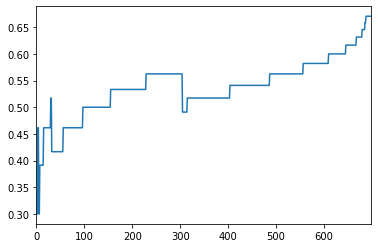

In [66]:
pd.Series(avg_upvote).plot()

In [41]:
cards.loc[due_today]

,next_interval,factor,due,num_reviews,upvotes,downvotes
4750,2401,3.55776,1374,6,2,4
4751,2401,3.55776,1374,6,2,4
4752,3591,4.34838,1525,6,1,5
4753,3591,4.34838,1525,6,1,5
4754,3591,4.34838,1525,6,1,5
4755,3591,4.34838,1525,6,1,5
4756,3591,4.34838,1525,6,1,5
4757,3591,4.34838,1525,6,1,5
4758,3591,4.34838,1525,6,1,5
4759,3591,4.34838,1525,6,1,5


In [30]:
np.mean(review_time_per_day/60)

4.6875

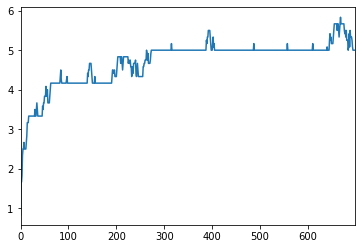

In [31]:
pd.Series(review_time_per_day/60).plot()

In [25]:
np.mean(review_time_per_day/60)

2.6764285714285716

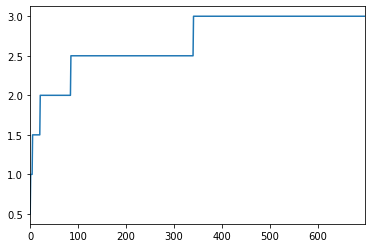

In [23]:
pd.Series(review_time_per_day/60).plot()

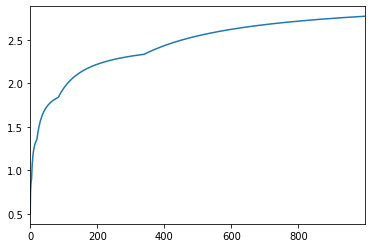

In [250]:
arr = (review_time_per_day/60).cumsum() / np.array(range(1,len(review_time_per_day)+1))
pd.Series(arr).plot()

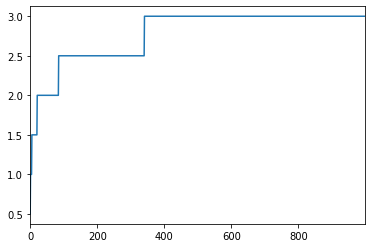

In [212]:
pd.Series(review_time_per_day/60).plot()

In [54]:
factor = 1.1
review_time = 13#s

In [55]:
from collections import defaultdict

In [56]:
d = defaultdict(int)

In [57]:
d[0] += 10
d[1] += 10
d[1] += 10

In [62]:
review_time_on_day = defaultdict(float)
current_day = 0
interval = 1
review_time_on_day[current_day] += 13
for i in range(10):
    current_day += interval
    review_time_on_day[current_day] += 13
    interval = factor*interval

In [65]:
last_day = int(max(review_time_on_day.keys()) + 2)
days = np.zeros(last_day, dtype=np.float)

In [66]:
last_day

17

In [68]:
days

array([13., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.])

In [67]:
for d,t in review_time_on_day.items():
    days[d] = t

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

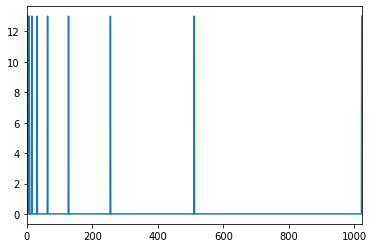

In [38]:
pd.Series(days).plot()

In [34]:
days

array([13, 13,  0, ...,  0,  0, 13])

In [52]:
total_review_mins = 0
avg_review_over_time = []
for days_reviewed,review_mins in enumerate(days[:1000]):
    total_review_mins += review_mins
    avg_review_over_time.append(total_review_mins/(days_reviewed+1))

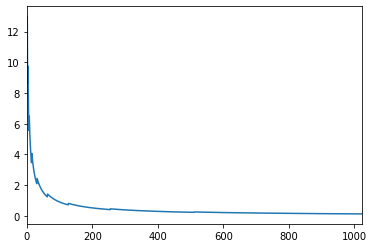

In [43]:
pd.Series(avg_review_over_time).plot()

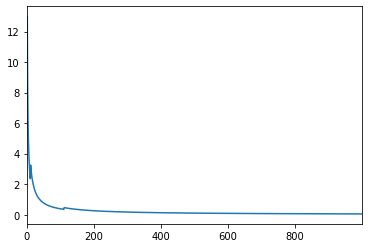

In [53]:
pd.Series(avg_review_over_time).plot()

In [29]:
days

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
max(review_time_on_day.keys())

1023

In [18]:
pd.Series(review_time_on_day).plot.

0       13
1       13
3       13
7       13
15      13
31      13
63      13
127     13
255     13
511     13
1023    13
dtype: int64

In [16]:
review_time_on_day

defaultdict(int,
            {0: 13,
             1: 13,
             3: 13,
             7: 13,
             15: 13,
             31: 13,
             63: 13,
             127: 13,
             255: 13,
             511: 13,
             1023: 13})

In [ ]:
k